In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

### Import data

In [2]:
data = pd.read_csv('./demo-datasets/social_network_ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Exploratory data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


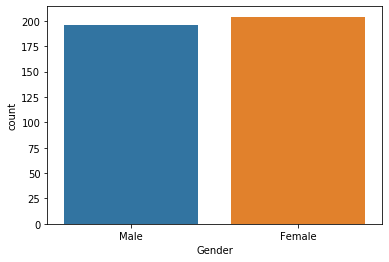

In [5]:
sns.countplot('Gender', data=data)

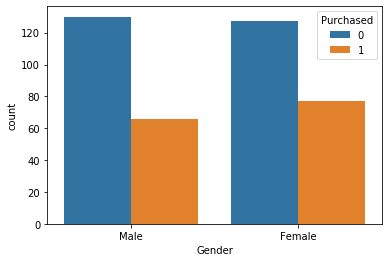

In [6]:
sns.countplot('Gender', hue='Purchased', data=data)

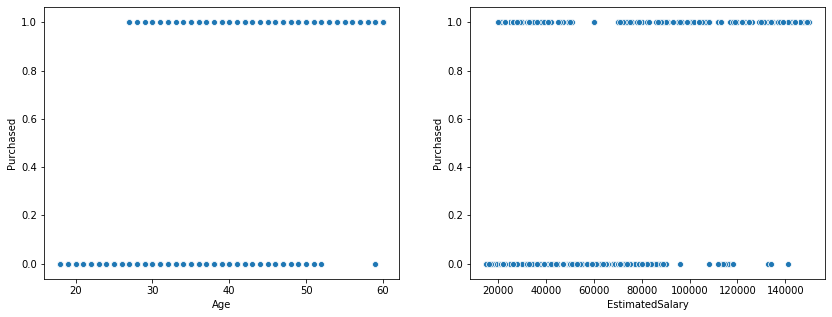

In [7]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.scatterplot('Age', 'Purchased', data=data)
plt.subplot(122)
sns.scatterplot('EstimatedSalary', 'Purchased', data=data)

Conclusions of EDA:
* Males and females are equally likely to make a purchase.
* The older a person is, the more likely he/she might make a purchase.
* If a person earns more money, it is somewhat more likely that he/she might make a purchase. However, it is a weaker predictor than age.

### Visual demonstration of a Sigmoid function
Let's demonstrate what sigmoid function of a logistic regression with one variable, _Age_, looks like.

$$\Large
sigmoid(x)=\frac{1}{1+e^{-x}}$$

In [8]:
x = data['Age'].values.reshape(-1, 1)
y = data['Purchased']

In [9]:
lr = LogisticRegression(solver='lbfgs')

In [10]:
lr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

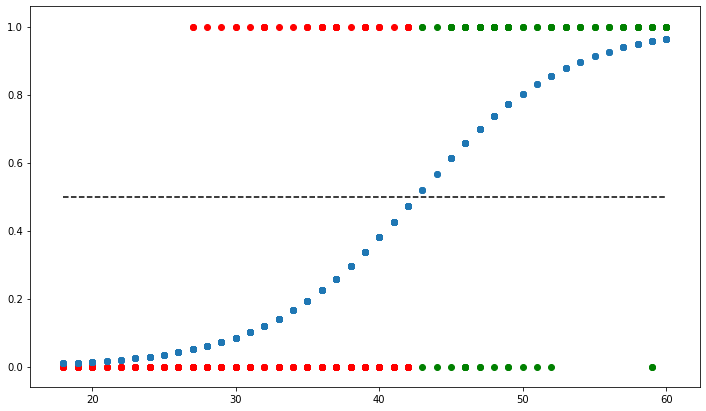

In [11]:
prob = lr.predict_proba(x)[:, 1]

# changing threshold will change which samples are classified 1 (Purchased) and which are classified 0 (Not Purchased)
th = 0.5
plt.figure(figsize=(12, 7))
plt.scatter(x[prob < th], y[prob < th], c='red', )
plt.scatter(x[prob >= th], y[prob >= th], c='green')
plt.scatter(x, lr.predict_proba(x)[:, 1])
plt.hlines(th, min(x), max(x), linestyles='dashed')

In [12]:
print('Intercept: {0}'.format(round(lr.intercept_[0], 3)))
print('Coef: {0}'.format(round(lr.coef_[0][0], 3)))

Intercept: -8.041
Coef: 0.189


$$\Large
ProbPurchased(age)=\frac{1}{1+e^{-(-8.041+0.189*age)}}$$

In [13]:
probdf = pd.DataFrame(data={'Age': x[:, 0], 'ProbPurchased': lr.predict_proba(x)[:, 1]})

In [14]:
probdf.drop_duplicates('Age').sort_values('Age')

,Age,ProbPurchased
14,18,0.009551
0,19,0.011514
12,20,0.013874
32,21,0.016711
58,22,0.020115
45,23,0.024195
50,24,0.029079
8,25,0.034914
2,26,0.041868
3,27,0.050136


### Logistic Regresion
Now let's do logistic regression using _Age_ and _EstimatedSalary_ as independent variales (features) and _Purchased_ as our target feature.

### Splitting data into _train_ and _test_ datasets

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
x = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Rescaling independent variables

In [18]:
scaler = StandardScaler()

In [19]:
# first five rows of scaled values
scaler.fit_transform(x_train)[:5]

array([[ 0.37899986,  0.12925992],
       [-0.28480306, -0.76251847],
       [ 0.37899986,  0.07172583],
       [ 1.80143469, -0.30224575],
       [-0.94860598, -0.33101279]])

In [20]:
# first five rows of unscaled (original) values
x_train.values[:5]

array([[   42, 75000],
       [   35, 44000],
       [   42, 73000],
       [   57, 60000],
       [   28, 59000]], dtype=int64)

In [21]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Creating a model

In [22]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_predicted = logreg.predict(x_test_scaled)

### Analyzing regression results

In [24]:
import sklearn.metrics as skmetrics

## **Confusion Matrix**
Confusion matrix describes the performance of a classification model.<br>
<br>
**True Positives (TP)** - These are the correctly predicted positive values. E.g. if actual class value indicates that this person was admitted to university, the predicted value tells the same thing.<br>
<br>
**True Negatives (TN)** - These are the correctly predicted negative values. E.g. if actual class value indicates that this person was NOT admitted to university, the predicted value tells the same thing.<br>
<br>
**False Positives (FP)** - Classification model predicted positive values, but actual class values are negative. In statistics this type of error is called **Type I** error. E.g. model predicted that you were admitted to university, when in reality you were not. Another example, a GP diagnosed that you have a cancer, when in reality you don't.<br>
<br>
**False Negative (FN)** - Classification model predicted negative values, but actual class values are positive. In statistics this type of error is called **Type II** error. E.g. doctor diagnoses that you do NOT have a cancer, when actually you do.

In [25]:
y_test.value_counts()

0    73
1    27
Name: Purchased, dtype: int64

In [26]:
skmetrics.confusion_matrix(y_test, y_predicted)

array([[67,  6],
       [ 7, 20]], dtype=int64)

## **Accuracy**
Accuracys is the most intuitive performance measure and it is simply a ratio of correctly predicted observations to the total observations.

$$Accuracy=\frac{True Positive+True Negative}{All Observations}$$

In [27]:
print('Our model has correctly classified {0}% of all observations in the test data' \
      .format(skmetrics.accuracy_score(y_test, y_predicted) * 100))

Our model has correctly classified 87.0% of all observations in the test data


## **Precision**
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

$$Precision_{Positives}=\frac{True Positive}{True Positive+FalsePositive}$$


In [28]:
prec = skmetrics.precision_score(y_test, y_predicted, average=None)
prec = (prec * 100).round(1)
print('Out of all predicted positives (1), the model was correct about {0}% of them.\n' \
      'The remaining {1}% of predicted positives should have been classified as negatives (0). (Type I error)\n' \
      .format(prec[1], round(100 - prec[1], 1)))
print('Out of all predicted negatives (0), the model was correct about {0}% of them.\n' \
      'The remaining {1}% of predicted negatives should have been classified as positives (1). (Type II error)' \
      .format(prec[0], round(100 - prec[0], 1)))

Out of all predicted positives (1), the model was correct about 76.9% of them.
The remaining 23.1% of predicted positives should have been classified as negatives (0). (Type I error)

Out of all predicted negatives (0), the model was correct about 90.5% of them.
The remaining 9.5% of predicted negatives should have been classified as positives (1). (Type II error)


## **Recall**
Recall is the ratio of correctly predicted (recalled) positive observations out of all true positive observations

$$Recall=\frac{True Positive}{True Positive+False Negative}$$

In [29]:
recall = skmetrics.recall_score(y_test, y_predicted, average=None)
recall = (recall * 100).round(1)
recall

array([91.8, 74.1])

In [30]:
print('Our model correctly classified (recalled) {0}% positives (1) and {1}% negatives (0).\n' \
     .format(recall[1], recall[0]))

Our model correctly classified (recalled) 74.1% positives (1) and 91.8% negatives (0).



In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [32]:
predicted_prob = logreg.predict_proba(x_test_scaled)[:, 1]

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_prob)

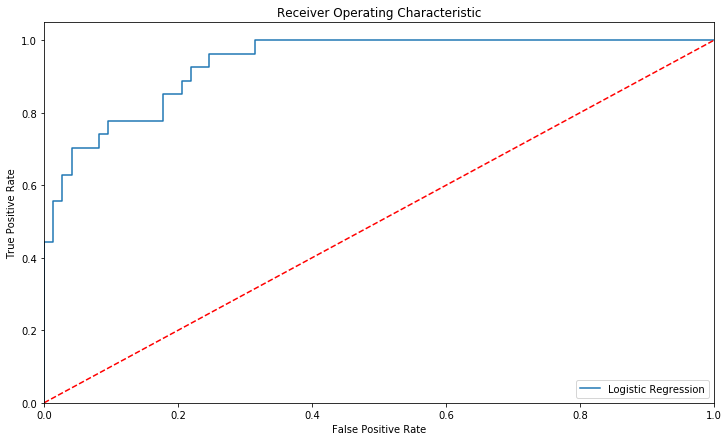

In [34]:
plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [35]:
roc_table = pd.DataFrame(data={'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})

In [36]:
roc_table

,fpr,tpr,thresholds
0,0.000000,0.000000,1.996140
1,0.000000,0.037037,0.996140
2,0.000000,0.444444,0.860176
3,0.013699,0.444444,0.833145
4,0.013699,0.555556,0.803207
5,0.027397,0.555556,0.771316
6,0.027397,0.629630,0.724716
7,0.041096,0.629630,0.703190
8,0.041096,0.703704,0.594398
9,0.082192,0.703704,0.515111


In [37]:
from sklearn.preprocessing import binarize

In [38]:
y_new_predicted = binarize(predicted_prob.reshape(1, -1), 0.39)[0]

In [39]:
skmetrics.confusion_matrix(y_test, y_new_predicted.astype(int))

array([[58, 15],
       [ 4, 23]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, y_new_predicted))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        73
           1       0.61      0.85      0.71        27

    accuracy                           0.81       100
   macro avg       0.77      0.82      0.78       100
weighted avg       0.85      0.81      0.82       100

